In [ ]:
%%capture install
try:
  import imlms
  print('Already installed')
except:
  %pip install git+https://github.com/Mads-PeterVC/imlms

In [ ]:
print(install.stdout.splitlines()[-1])

In [2]:
import torch
import matplotlib.pyplot as plt

# Pytorch

Pytorch is a package that is very commonly used for machine learning. One primary 
reason for this is *automatic differentiation*.

As you probably know analytically differentiating a function is a tiresome process and 
implementing a program to calculate them is generally more complicated than calculating 
the function itself. 

Auto differentiation is a way of avoiding this hurdle. 

### Example: Auto differentiation of a simple function.

We can try auto-diff for the trivial function 

$$
f(x) = x^2
$$

Where the derivative is 

$$
f'(x) = 2x
$$

In [2]:
def f(x):
    return x**2

def f_prime(x):
    return 2*x

Nothing special about these function definitions, they are completely normal Python code.

In [19]:
x = torch.linspace(0, 10, 100, requires_grad=True) # Line 1
y = f(x) # Line 2
y_prime_auto = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y))[0] # Line 3

Here some magic happens that we will digest later, but first visually that the 
two ways of calculating the derivative worked. 

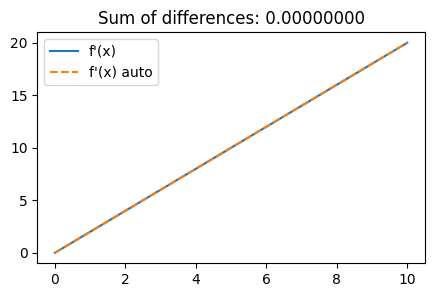

In [15]:
fig, ax = plt.subplots(figsize=(5, 3))

y_prime = f_prime(x) # Calculate the analytical derivative to compare against. 

ax.plot(x.detach().numpy(), y_prime.detach().numpy(), label="f'(x)")
ax.plot(x.detach().numpy(), y_prime_auto.detach().numpy(), '--', label="f'(x) auto")

difference = torch.abs(y_prime - y_prime_auto).sum()
ax.set_title(f"Sum of differences: {difference.item():.8f}")

ax.legend()
plt.show()

Now lets work through the details of the calculation

1. `x = torch.linspace(0, 10, 100, requires_grad=True)`
    - Here we create a `torch.Tensor` of values ranging from 1 to 100. The `requires_grad=True` argument tells torch that we will want gradients wrt. `x` of any calculations done with `x`. 
2. `y = f(x)`
    - We calculate the function value, nothing special here except that because `x` is a `torch.Tensor` the calculation happens in torch. 
3. `y_prime_auto = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y))[0]`
    - The `torch.autograd.grad` function will compute the derivative of the first argument wrt. to the second. The `grad_outputs=torch.ones_like(y)` argument is only necessary because we have vectors for `y` rather than just a single scalar. 

You may have noticed that sometimes syntax like `x.detach().numpy()` is used. 

This is done in order for torch to allow the tensor to be converted to a Numpy array. 
The detach statement is telling Torch that it doesn't need to keep track off computations with the 
returned tensor. 

The same can be realized with `with torch.no_grad()` telling torch that computations done within that context 
won't need to have gradients calculated. 

### Exercise: Another polynomial

Consider the function

$$
f(x) = x^3 + x^2 + x
$$
Use torch to compute the derivative in the interval [0, 10] and compare to the analytical solution

In [21]:
def f(x):
    return x**3 + x**2 + x

def f_prime(x):
    return 3*x**2 + 2*x + 1

In [22]:
x = torch.linspace(0, 10, 100, requires_grad=True) # Line 1
y = f(x) # Line 2
y_prime_auto = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y))[0] # Line 3

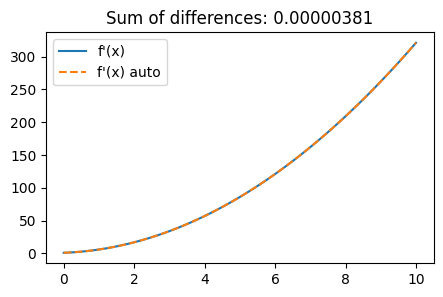

In [23]:
fig, ax = plt.subplots(figsize=(5, 3))

y_prime = f_prime(x) # Calculate the analytical derivative to compare against. 

ax.plot(x.detach().numpy(), y_prime.detach().numpy(), label="f'(x)")
ax.plot(x.detach().numpy(), y_prime_auto.detach().numpy(), '--', label="f'(x) auto")

difference = torch.abs(y_prime - y_prime_auto).sum()
ax.set_title(f"Sum of differences: {difference.item():.8f}")

ax.legend()
plt.show()

### Example: Higher-order derivatives

We are not limited to just first-order derivatives, we can compute derivatives to arbitrary order using 
autodifferentiation. 

In [24]:
def f(x):
    return x**2

In [30]:
x = torch.linspace(0, 10, 100, requires_grad=True)
y = f(x)
y_prime_auto = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y), create_graph=True)[0]
y_prime_prime_auto = torch.autograd.grad(y_prime_auto, x, grad_outputs=torch.ones_like(y_prime_auto))[0]

print(y_prime_prime_auto) # This will print a tensor of 2's as expected.

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


### Example: Multi-dimensional function

We can use autodifferentiation to get all the partial derivatives of a function of 
multiple variables, e.g

$$
f(x, y) = 3 x^2 + 7 y^2 + xy
$$

In [36]:
def f(tensor):
    x = tensor[0]
    y = tensor[1]
    return 3 * x**2 + 7 * y**2 + x * y

xy = torch.tensor([1.0, 2.0], requires_grad=True)

z = f(xy)
df = torch.autograd.grad(z, xy, create_graph=True)[0]
print(df)

tensor([ 8., 29.], grad_fn=<AddBackward0>)


### Exercise: Electric Field

Consider the scalar potential of an electric charge 

$$
V(\bar{r}) = \frac{kq}{|\bar{r}-\bar{r_0}|}
$$

Where $r_0$ is the position of the charge. In two dimensions we could write this as

$$
V(x, y) = \frac{kq}{\sqrt{(x-x_0)^2 + (y-y_0)^2}}
$$

As we know, the electric field is the negative gradient of the potential 
$$
\mathbf{E} = -\nabla V
$$
Use Pytorch to calculate the electric field.

Start by defining a function that calculates the potential as a function of a tensor $X$
where the first element is $x$ and the second is $y$.

In [3]:
x0 = 5.0
y0 = 5.0

def V(X):
    x = X[0]
    y = X[1]
    r = torch.sqrt((x-x0)**2 + (y-y0)**2)
    return 1/r

Now define another function that calculates the electric field using automatic differentiation

In [4]:
def E(X):
    v = V(X)
    e = -torch.autograd.grad(v, X)[0]
    return e

Then we can try the function

In [5]:
X = torch.tensor([1.0, 1.0], requires_grad=True)
e = E(X)
print(e)

tensor([-0.0221, -0.0221])


We can plot the field using a quiver plot

(-0.5, 10.5, -0.5, 10.5)

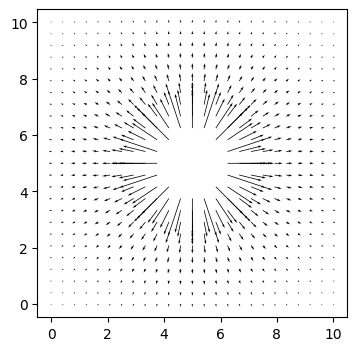

In [9]:
N = 25
field = torch.zeros((N, N, 2))

x = torch.linspace(0, 10, N)
y = torch.linspace(0, 10, N)

for i, _x in enumerate(x):
    for j, _y in enumerate(y):

        if (_x - x0)**2 + (_y - y0)**2 < 1.0: # This is just a hack to avoid the singularity at (x0, y0).
            field[i, j] = torch.tensor([torch.nan, torch.nan])
            continue

        X_tensor = torch.tensor([_x, _y], requires_grad=True)
        field[i, j] = E(X_tensor)

fig, ax = plt.subplots(figsize=(4, 4))

X, Y = torch.meshgrid(torch.linspace(0, 10, N), torch.linspace(0, 10, N))

ax.quiver(X, Y, field[:, :, 0].detach().numpy(), 
          field[:, :, 1].detach().numpy(), 
          )

ax.axis('equal')

Which matches the expected field rather well. 

An extension of this exercise would be to have the potential be the result of multiple 
point-charges at different locations - so try that at some point if you like. 

### Example: Gradient Descent & Learning

We have seen a few examples of gradients so far, another is gradient descent. 
With gradient descent we optimize a function by taking small steps in the direction 
of the gradient.

There are many use cases of such optimizations, we can focus on one involving what one 
may call 'fitting', 'regression' or 'learning'. Lets say we have some experimental observations 
$[(x_1, y_1), .., (x_N, y_N)]$ that we wish to explain with a model $M_\theta$ where $\theta$ denotes the parameters of the model

We want to find the parameters of our model that makes it fit the data the best, 
and to do so we want a function that we can minimize wrt. the parameters. One 
intuitive choice is 

$$
L(\theta) = \frac{1}{N}\sum_i^N \Big(M_\theta(x_i) - y_i\Big)^2,
$$

which is the *mean squared error loss* between the model and the observations. 

We are free to choose our model, for this example we will choose a linear model

$$
M_\theta(x) = \alpha x + \beta
$$

So our model has two parameters thus $\theta = [\alpha, \beta]$. 
We want to minimize the loss $L$ wrt. the parameters $\theta$ by iteratively 
taking small steps in the direction of the gradient of $L$ wrt. $\theta$. 
That is, 

$$
\theta_{i+1} = \theta_i - \alpha \nabla_\theta L
$$

Where $\alpha$ is typically called the learning rate. We want to calculate $ \nabla_\theta L$ using automatic differentiation.

Lets set this up, first we could define the model

In [70]:
def model(x, theta):
    return theta[0] * x + theta[1]

def loss_fn(y_pred, y):
    return torch.mean((y_pred - y)**2)

The next cell creates the data we will fit to

In [71]:
from imlms.torch import get_example_data

X, y = get_example_data()

And finally we are ready to implement the gradient descent loop

In [82]:
theta = torch.tensor([1.0, 1.0], requires_grad=True) # Initial parameters for the model.

y_pred_initial = model(X, theta)

N_steps = 100
learning_rate = 0.05

for i in range(N_steps):

    y_pred = model(X, theta)
    loss = loss_fn(y_pred, y)

    if i % 10 == 0:
        print(f"Loss {i}: {loss.item():0.3f}")

    gradient = torch.autograd.grad(loss, theta)[0]

    with torch.no_grad():
        theta -= learning_rate * gradient

y_pred_final = model(X, theta)

Loss 0: 1.668
Loss 10: 0.442
Loss 20: 0.222
Loss 30: 0.160
Loss 40: 0.137
Loss 50: 0.126
Loss 60: 0.121
Loss 70: 0.118
Loss 80: 0.117
Loss 90: 0.117


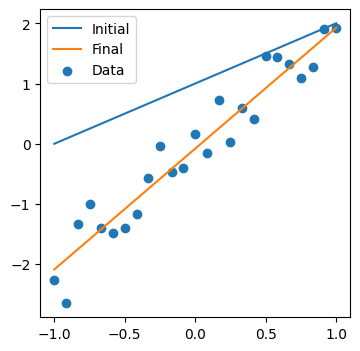

In [78]:
fig, ax = plt.subplots(figsize=(4, 4))

with torch.no_grad():
    ax.plot(X.detach().numpy(), y_pred_initial.detach().numpy(), label="Initial")
    ax.plot(X.detach().numpy(), y_pred_final.detach().numpy(), label="Final")
    ax.scatter(X.detach().numpy(), y.detach().numpy(), label="Data")

ax.legend()

### Exercise: Damped Harmonic Oscillator

After countless hours in the lab you have gathered data on the very important 
phenonenom of quark anti-space mega amplitude. You believe that the property 
you have measured should behave like a damped harmonic oscillator following the 
expression 

$$
M(t) = A \exp^{-\gamma t} \cos(\omega t)
$$

Where $t$ is the time and $A$, $\gamma$ and $\omega$ are parameters that you wish to 
find.

Use the same methodology as above to find the best set of parameters $\theta = [A, \gamma, \omega]$. 

The cell below generates your dataset

In [2]:
from imlms.torch import get_damped_osc_dataset

t, y = get_damped_osc_dataset()

Define your model and loss function

In [3]:
def model(t, theta):
    A, gamma, omega = theta
    return A * torch.exp(-gamma * t) * torch.cos(omega * t)

def loss_fn(y_pred, y):
    return torch.mean((y_pred - y)**2)

Then create the training loop 

In [6]:
theta = torch.tensor([1.0, 1.0, 1.0], requires_grad=True) # Initial parameters for the model.

y_pred_initial = model(t, theta)

N_steps = 200
learning_rate = 0.05

for i in range(N_steps):

    y_pred = model(t, theta)
    loss = loss_fn(y_pred, y)

    if i % 10 == 0:
        print(f"Loss {i}: {loss.item():0.3f}")

    gradient = torch.autograd.grad(loss, theta)[0]

    with torch.no_grad():
        theta -= learning_rate * gradient

y_pred_final = model(t, theta)

Loss 0: 0.190
Loss 10: 0.177
Loss 20: 0.165
Loss 30: 0.152
Loss 40: 0.139
Loss 50: 0.125
Loss 60: 0.109
Loss 70: 0.092
Loss 80: 0.071
Loss 90: 0.046
Loss 100: 0.021
Loss 110: 0.011
Loss 120: 0.009
Loss 130: 0.008
Loss 140: 0.007
Loss 150: 0.007
Loss 160: 0.006
Loss 170: 0.006
Loss 180: 0.005
Loss 190: 0.005


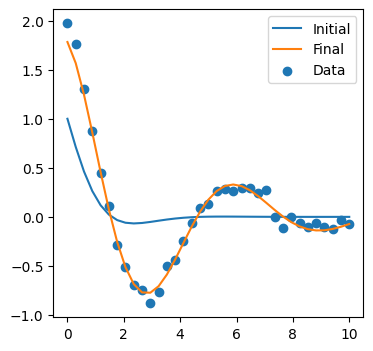

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))

with torch.no_grad():
    ax.plot(t.detach().numpy(), y_pred_initial.detach().numpy(), label="Initial")
    ax.plot(t.detach().numpy(), y_pred_final.detach().numpy(), label="Final")
    ax.scatter(t.detach().numpy(), y.detach().numpy(), label="Data")

ax.legend()

### Example: Torch OOP

So far our models have been very simple, containing only a few parameters so we have 
managed to just keep them in a tensor `theta`. However, models can have a huge amount of parameters - some language models, such as ChatGPT, are thought to 
have over a trillion parameters. Keeping track of that many parameters in the way we have been doing would be difficult. 

Our rescue is `torch.nn.Module`, which helps us in several ways. Below is an example, 
where I have implemented the model from the previous exercise as a `torch.nn.Module`-derived 
class.

In [3]:
class DampenedOscillator(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(1.0))        
        self.omega = torch.nn.Parameter(torch.tensor(1.0))
        self.gamma = torch.nn.Parameter(torch.tensor(1.0))

    def forward(self, t):
        return self.A * torch.exp(-self.gamma * t) * torch.cos(self.omega * t)


Now all the parameters are accesible to us through methods of the our class

In [6]:
oscillator = DampenedOscillator()

print('Parameters:')
for parameter in oscillator.parameters():
    print(parameter)

print('Named parameters:')
for name, parameter in oscillator.named_parameters():
    print(name, parameter)

Parameters:
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Named parameters:
A Parameter containing:
tensor(1., requires_grad=True)
omega Parameter containing:
tensor(1., requires_grad=True)
gamma Parameter containing:
tensor(1., requires_grad=True)


Using the model is simple

In [8]:
t = torch.tensor([1.0])
y = oscillator(t) # Equivalent to calling oscillator.forward(t)
print(t, y)

tensor([1.]) tensor([0.1988], grad_fn=<MulBackward0>)
